<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Receiver Operating Characteristic (ROC) Curve

The ROC curve is a plot of the true positive rate (TPR) vs. the false positive rate (FPR). The TPR is the percentage of true positives out of all actual positives while the FPR is the percentage of false positives out of all actual negatives.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [ ]:
df = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613253521__modifiedIris2Classes.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [ ]:
# Split into X and y
X = df.drop(columns = 'target')
y = df['target']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Make an instance of the model
logreg = LogisticRegression(C = .001)
# Scaling logistic regression
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.001))])

In [ ]:
# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')

Training AUC: 0.9565527065527065
Testing AUC: 0.987012987012987


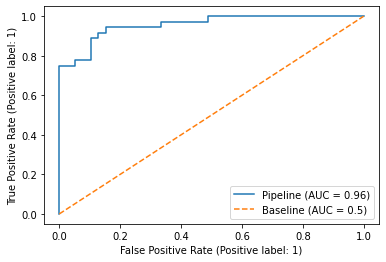

In [ ]:
# Visualize the ROC curve
RocCurveDisplay.from_estimator(logreg_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [ ]:
# Different plot needed for different classes

# Load multiclass iris data
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
y.unique()

array([0, 1, 2])

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Fit a logistic regression model
clf = LogisticRegression(multi_class='ovr', C=.01)
clf.fit(X_train, y_train)
# Retrieve the predicted probabilities for the test data
y_pred = clf.predict_proba(X_test)
y_pred[:5].round(2)

array([[0.16, 0.33, 0.51],
       [0.28, 0.34, 0.37],
       [0.62, 0.24, 0.14],
       [0.08, 0.32, 0.6 ],
       [0.61, 0.26, 0.14]])

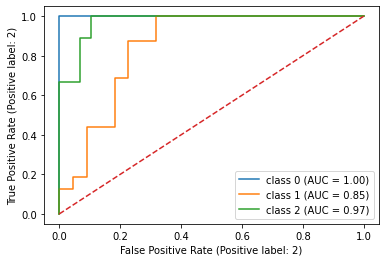

In [ ]:
# Create a new figure and axis
fig, ax = plt.subplots(1)
# Iterate over the labels the classifier has seen
for i, label in enumerate(clf.classes_):
  # Draw a ROC curve for each separate class.
  RocCurveDisplay.from_predictions(
    y_test, y_pred[:,i], pos_label=label, ax=ax, name=f'class {label}')
ax.plot([0, 1], [0, 1], ls='--', label='Baseline (AUC = 0.5)')
plt.show()

# Summary
Receiver Operator Characteristic or ROC shows how well a model can differentiate between classes. A ROC curve shows the relationship between the true and false positive rates of a model across different decision thresholds. The Receiver Operator Characteristic Area Under the Curve is a single number that describes the percentage of the ROC curve plot beneath the curve. This is a way to evaluate a model across all decision thresholds.

ROC is inherently a binary metric because it compares true and false positives. However, you can plot ROC curves for multiple classes by plotting each class separately.